Raíces encontradas con método de Newton:
-151.99999999998278
-125.99999995221714


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


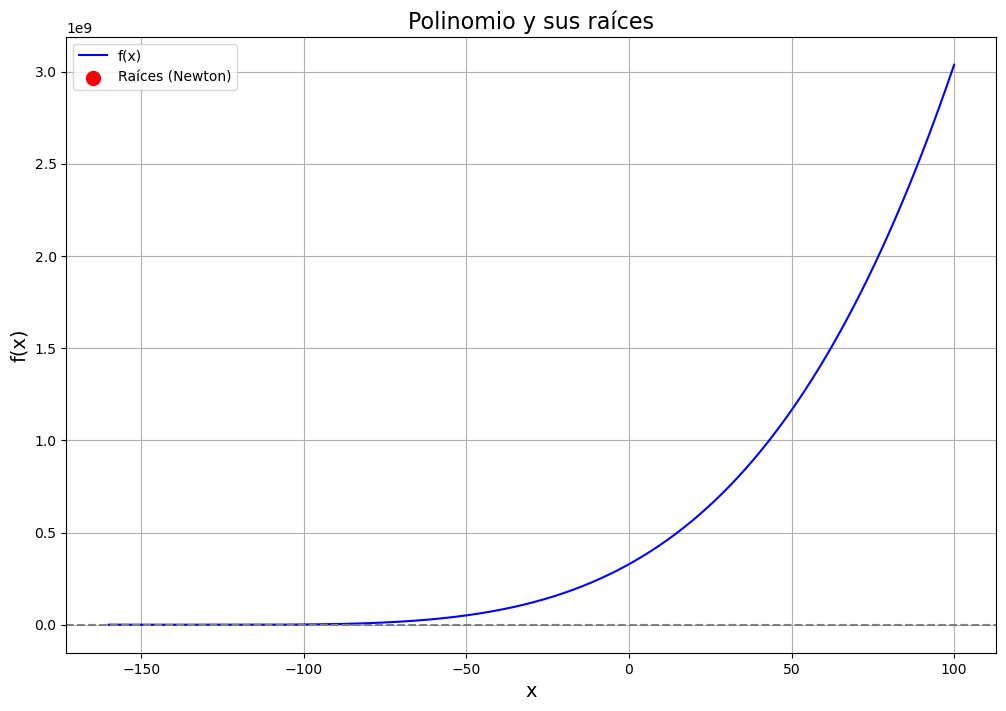

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from matplotlib.animation import FuncAnimation
import random

# Definición del polinomio y su derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prime(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

# Intentos con distintos valores iniciales para encontrar múltiples raíces
valores_iniciales = [-500, -200, -100, -50, -10, 0, 10]
raices = []

for x0 in valores_iniciales:
    try:
        raiz = newton(f, x0, fprime=f_prime)
        # Añadir raíz si no está ya en la lista (evitar duplicados con tolerancia)
        if not any(np.isclose(raiz, r, atol=1e-6) for r in raices):
            raices.append(raiz)
    except RuntimeError:
        pass  # Si no converge, continuar con el siguiente valor

# Mostrar raíces encontradas
print("Raíces encontradas con método de Newton:")
for r in raices:
    print(r)

# Graficar el polinomio
x = np.linspace(-160, 100, 500)
y = f(x)

# Configuración de la figura para la animación
fig, ax = plt.subplots(figsize=(12, 8))
line, = ax.plot(x, y, label='f(x)', color='blue')
ax.axhline(0, color='gray', linestyle='--')
scatter_points = ax.scatter([], [], color='red', label='Raíces (Newton)', s=100)
ax.set_title('Polinomio y sus raíces', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('f(x)', fontsize=14)
ax.legend()
ax.grid(True)

# Lista de colores para el título y el punto
colores_titulo = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

# Función de inicialización para la animación
def init():
    scatter_points.set_offsets(np.empty((0, 2)))
    return line, scatter_points

# Función de actualización para la animación
def update(frame):
    if frame < len(raices):
        # Actualizar los puntos de las raíces
        scatter_points.set_offsets([[raices[frame], f(raices[frame])]])

        # Cambiar el color del título y del punto de la raíz
        color_actual = random.choice(colores_titulo)
        ax.set_title(f'Polinomio y sus raíces: {raices[frame]:.10f}', fontsize=16, color=color_actual)
        scatter_points.set_facecolor(color_actual)  # Cambiar color del punto

    return line, scatter_points

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(raices), init_func=init, blit=False, interval=1000)

plt.show()
